In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
sns.set(
        font_scale=2,
       style      ="whitegrid",
       rc         ={'figure.figsize':(40,20)}
)

In [4]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv", parse_dates=['Date'])

In [69]:
avocado_mean.AveragePrice.rolling(3).mean().max().round(2)# 2 задание

1.85

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

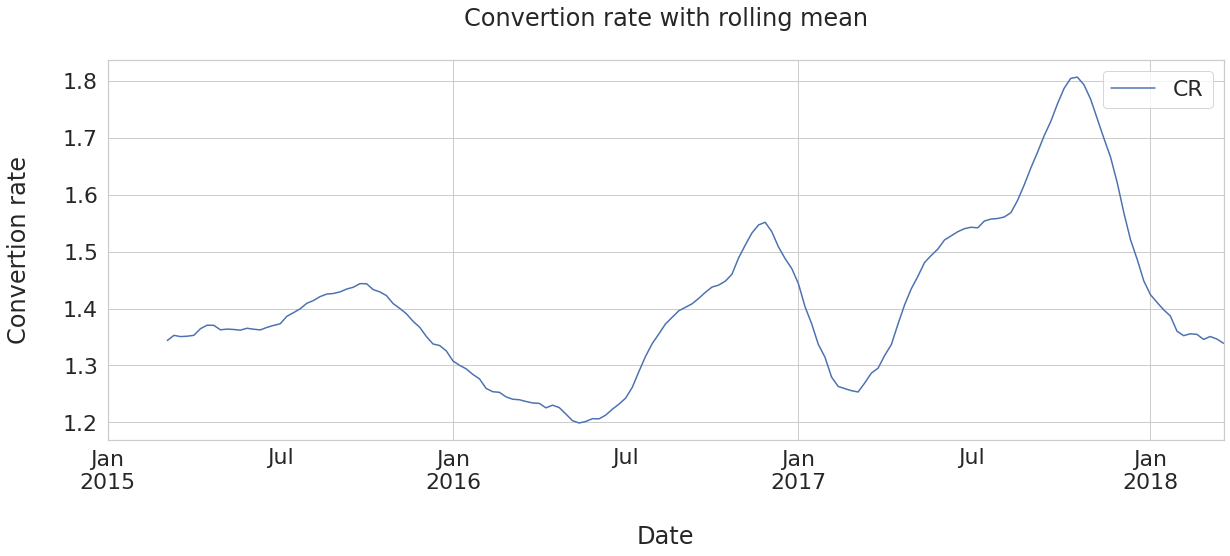

In [84]:
cr_by_avocado=avocado_mean.groupby(['Date'])\ #3 задание
    .agg({'AveragePrice' :'mean'})\
    .rename(columns={'AveragePrice':'CR'})\
    .sort_values('Date')\
    .rolling(10).mean()
ax=cr_by_avocado.plot()
ax.set_title('Convertion rate with rolling mean\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')
sns.despine

In [107]:
avocado_ewm=avocado_mean.groupby(['Date'])\ #5 задание
    .agg({'AveragePrice' :'mean'})\
    .sort_values('Date')\
    .ewm(span=2).mean()
avocado_ewm

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758
...,...
2018-02-25,1.356212
2018-03-04,1.352194
2018-03-11,1.340793


In [108]:
avocado_full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/Lesson_6/avocado_full.csv', parse_dates=['Date'],index_col=0)

In [109]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


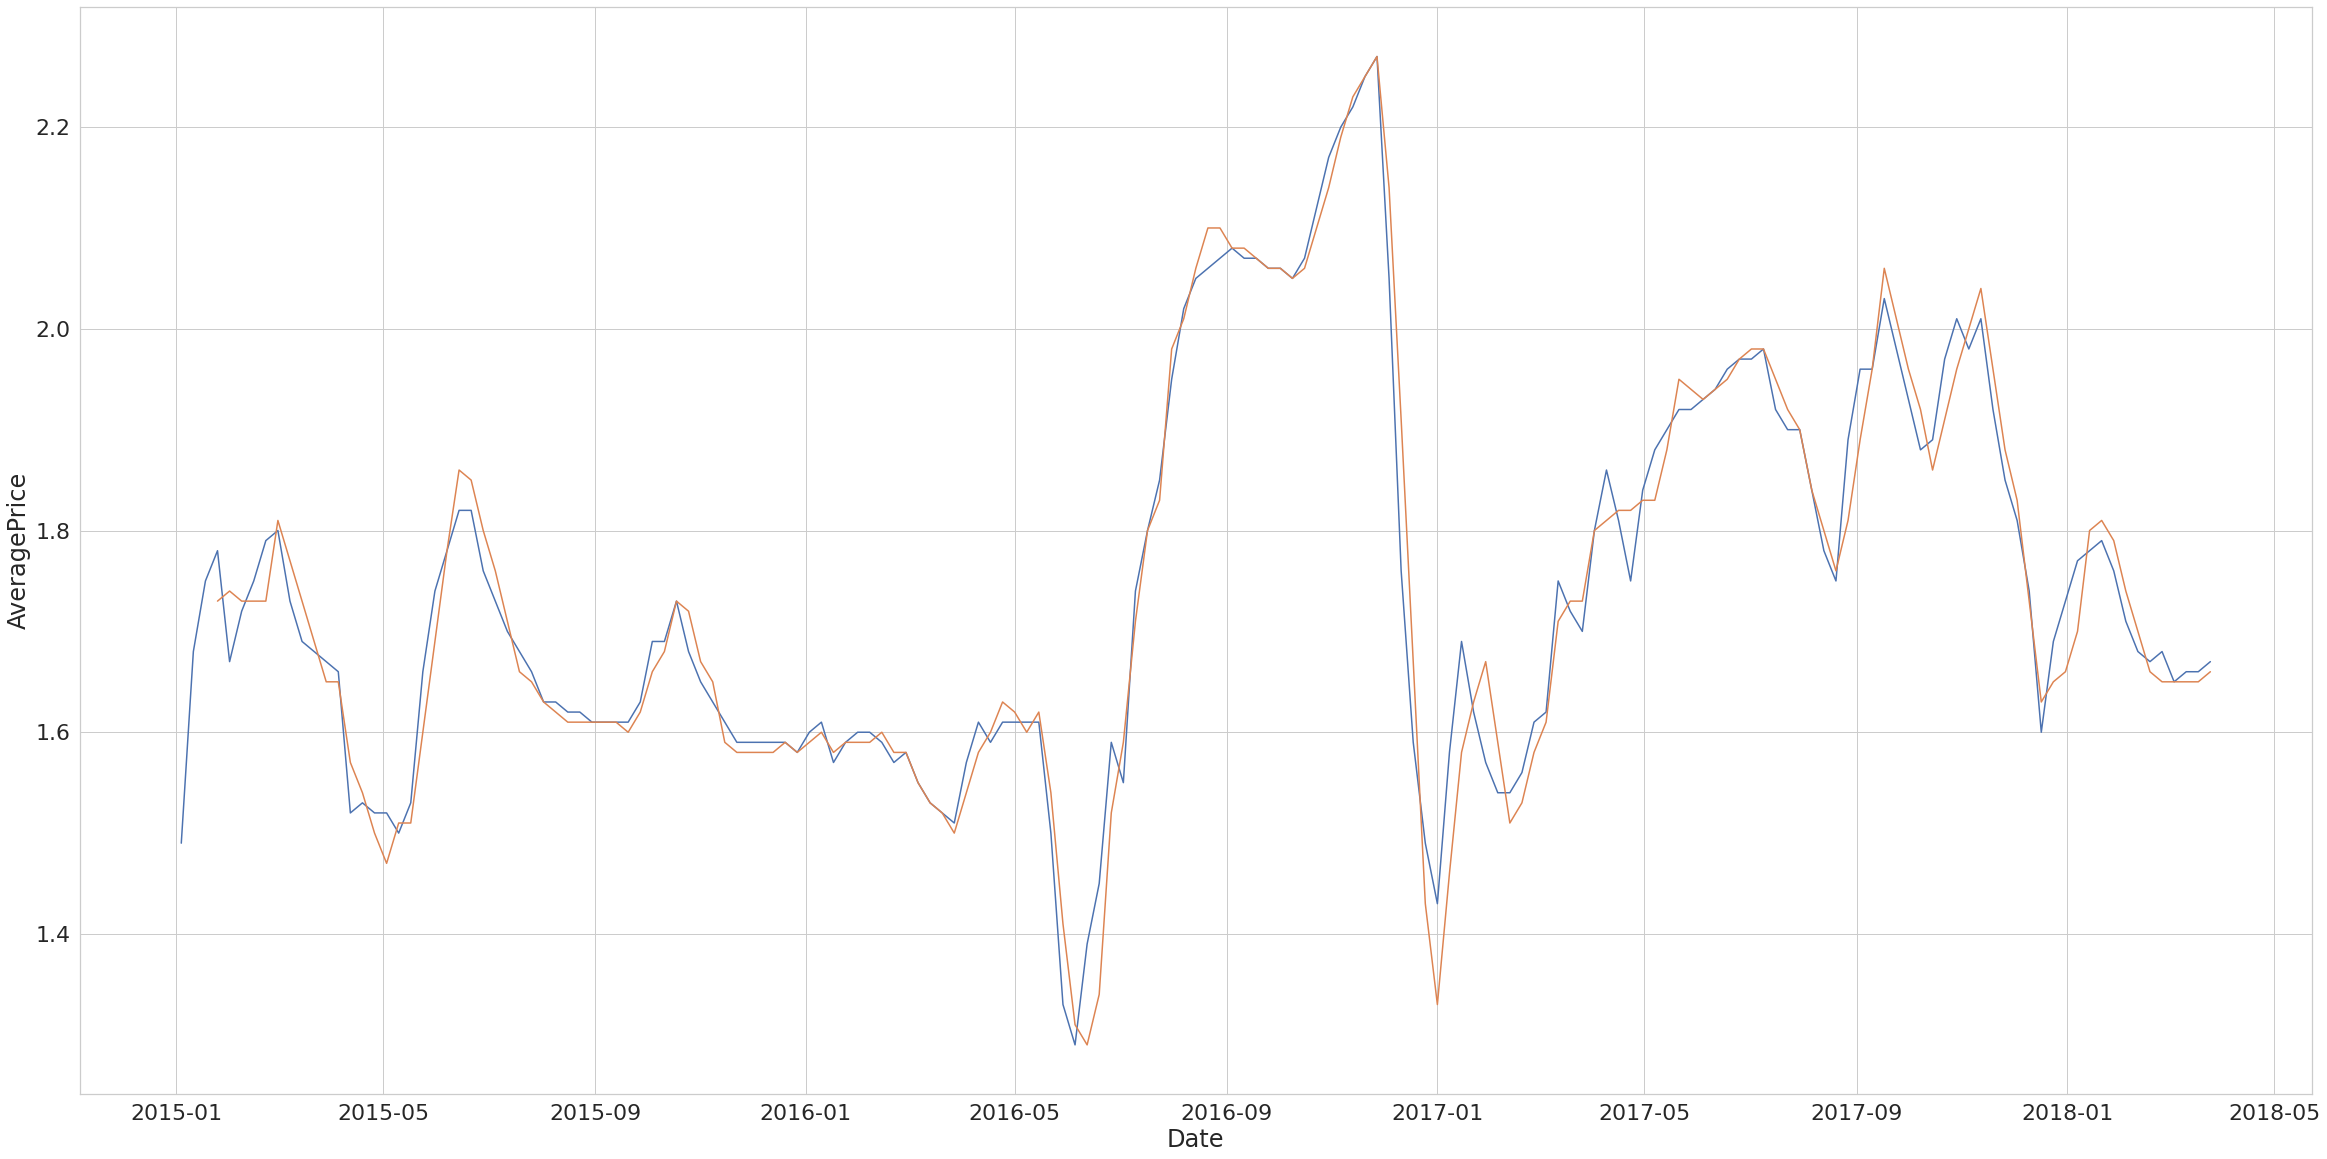

In [142]:
avocado_exp=avocado_full.query("type=='organic'and region=='Chicago'").groupby('Date')\
.agg({'AveragePrice':'mean'})\
.ewm(span=4).mean().round(2)
avocado_exp=avocado_exp.reset_index().dropna()
avocado_rol=avocado_full.query("type=='organic'and region=='Chicago'").groupby('Date')\
    .agg({'AveragePrice':'mean'})\
    .rolling(4).mean().round(2)
avocado_rol=avocado_rol.reset_index().dropna()
sns.lineplot(avocado_exp.Date, avocado_exp.AveragePrice)
sns.lineplot(avocado_rol.Date, avocado_rol.AveragePrice)

In [171]:
delays = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/Lesson_6/delays.csv')#7 задание
delays['delay'] = delays['delay'].str.replace('-','').apply(pd.to_timedelta)

In [172]:
delays

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [178]:
delays['delay_categorical']=pd.cut(delays.delay, bins=3)#8 задание

In [179]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [203]:
# Определение бинов для категорий
bins = [pd.Timedelta(days=0), pd.Timedelta(days=1), pd.Timedelta(days=2), pd.Timedelta(days=3), pd.Timedelta(days=999)]

# Определение названий для категорий
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

# Создание новой категориальной колонки в DataFrame
delays['delay_categorical'] = pd.cut(delays['delay'], bins=bins, labels=labels, right=False)
delays #9 задание


,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [201]:
px.bar(x=delays.delay_categorical,y=delays.client_id)#10 задание

In [193]:
a

Timedelta('0 days 00:00:00')

In [5]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704
